In [5]:
# For division
from __future__ import division

#Importing Libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt

%matplotlib inline

#For reading stock data from yahoo
import pandas_datareader as web

#For time stamps
from datetime import datetime

In [6]:
#Setting Up Ticker Symbol Used For Prediction Analysis
ticker = ['SPY']

#To Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 21,end.month,end.day)


#Creating loop for grabing Yahoo Finance data and setting as a DataFrame

for stock in ticker:   
    
    #To set DataFrame as the Stock Ticker
    
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)['Close']

In [7]:
SPY.head()

Date
1998-08-28    103.37500
1998-08-31     96.00000
1998-09-01    100.06250
1998-09-02     99.34375
1998-09-03     98.56250
Name: Close, dtype: float64

In [8]:
SPY.tail()

Date
2019-08-22    292.359985
2019-08-23    284.850006
2019-08-26    288.000000
2019-08-27    286.869995
2019-08-28    288.890015
Name: Close, dtype: float64

In [9]:
SPY.shape

(5284,)

Text(0, 0.5, 'Price')

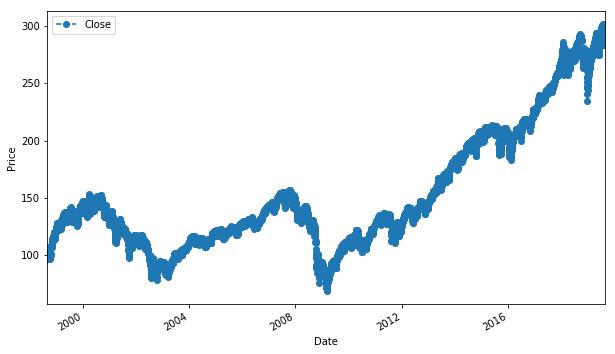

In [33]:
SPY.plot(figsize=(10,6),legend=True, linestyle='--', marker='o')
plt.ylabel("Price")

In [11]:
SPY.describe()

count    5284.000000
mean      153.249648
std        54.246193
min        68.110001
25%       115.570000
50%       134.051247
75%       188.165001
max       302.010010
Name: Close, dtype: float64

In [12]:
df = SPY
df.head()

Date
1998-08-28    103.37500
1998-08-31     96.00000
1998-09-01    100.06250
1998-09-02     99.34375
1998-09-03     98.56250
Name: Close, dtype: float64

In [13]:
df.describe()

count    5284.000000
mean      153.249648
std        54.246193
min        68.110001
25%       115.570000
50%       134.051247
75%       188.165001
max       302.010010
Name: Close, dtype: float64

In [14]:
df = df.reset_index()

In [15]:
df.head()

,Date,Close
0,1998-08-28,103.37500
1,1998-08-31,96.00000
2,1998-09-01,100.06250
3,1998-09-02,99.34375
4,1998-09-03,98.56250


In [16]:
df[['ds','y']] = df[['Date' ,'Close']]

In [17]:
df = df[['ds','y']]
df.head()

,ds,y
0,1998-08-28,103.37500
1,1998-08-31,96.00000
2,1998-09-01,100.06250
3,1998-09-02,99.34375
4,1998-09-03,98.56250


In [18]:
import fbprophet

In [19]:
m = fbprophet.Prophet()

In [20]:
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Karim Elbahloul\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [21]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
5644,2020-08-23
5645,2020-08-24
5646,2020-08-25
5647,2020-08-26
5648,2020-08-27


In [22]:
forecast = m.predict(future)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5644,2020-08-23,318.068059,300.061722,332.114561,304.645376,332.968106,-2.050656,-2.050656,-2.050656,-1.937689,-1.937689,-1.937689,-0.112966,-0.112966,-0.112966,0.0,0.0,0.0,316.017404
5645,2020-08-24,318.133401,301.805492,334.965896,304.543935,333.118324,0.616160,0.616160,0.616160,0.712767,0.712767,0.712767,-0.096607,-0.096607,-0.096607,0.0,0.0,0.0,318.749560
5646,2020-08-25,318.198742,301.907550,335.671937,304.442494,333.282975,0.739341,0.739341,0.739341,0.818972,0.818972,0.818972,-0.079631,-0.079631,-0.079631,0.0,0.0,0.0,318.938083
5647,2020-08-26,318.264083,303.604392,336.315838,304.341053,333.442937,0.723399,0.723399,0.723399,0.785962,0.785962,0.785962,-0.062563,-0.062563,-0.062563,0.0,0.0,0.0,318.987482
5648,2020-08-27,318.329425,303.114753,336.224280,304.239613,333.601632,0.784945,0.784945,0.784945,0.830813,0.830813,0.830813,-0.045867,-0.045867,-0.045867,0.0,0.0,0.0,319.114370


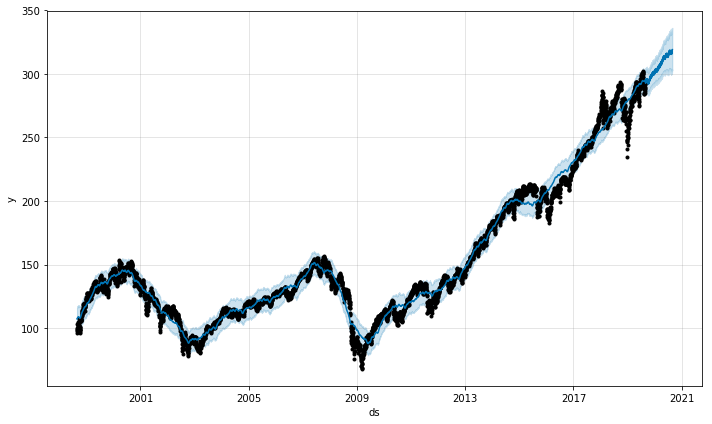

In [23]:
m.plot(forecast);

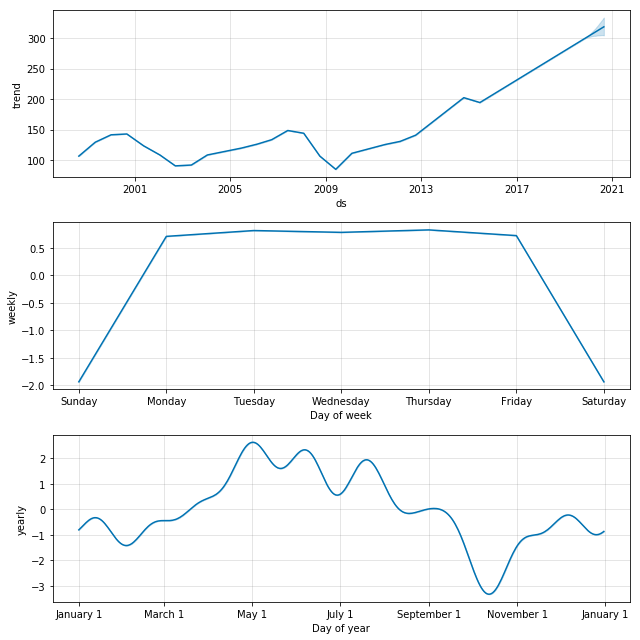

In [24]:
m.plot_components(forecast);

In [25]:
df.describe()

,y
count,5284.000000
mean,153.249648
std,54.246193
min,68.110001
25%,115.570000
50%,134.051247
75%,188.165001
max,302.010010


In [26]:
df.shape

(5284, 2)

In [27]:
forecast.shape

(5649, 19)

In [28]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.0,5649.0,5649.0,5649.000000
mean,162.420506,154.239562,172.063445,162.124828,162.738064,0.726933,0.726933,0.726933,0.726151,0.726151,0.726151,0.000782,0.000782,0.000782,0.0,0.0,0.0,163.147439
std,64.244792,63.846787,64.557358,63.568553,65.006435,1.459437,1.459437,1.459437,0.367851,0.367851,0.367851,1.411989,1.411989,1.411989,0.0,0.0,0.0,64.190019
min,84.922420,78.670021,96.394134,84.922420,84.922420,-5.268082,-5.268082,-5.268082,-1.937689,-1.937689,-1.937689,-3.330392,-3.330392,-3.330392,0.0,0.0,0.0,87.865336
25%,116.251894,108.234714,125.753286,116.251894,116.251894,-0.149015,-0.149015,-0.149015,0.726865,0.726865,0.726865,-0.896628,-0.896628,-0.896628,0.0,0.0,0.0,116.952718
50%,136.108216,128.009370,145.524386,136.108216,136.108216,0.561095,0.561095,0.561095,0.785962,0.785962,0.785962,-0.179633,-0.179633,-0.179633,0.0,0.0,0.0,136.687931
75%,200.551587,191.249269,208.834018,200.551587,200.551587,1.853553,1.853553,1.853553,0.818972,0.818972,0.818972,1.122265,1.122265,1.122265,0.0,0.0,0.0,200.105513
max,318.329425,304.777226,336.315838,304.885289,333.601632,3.457055,3.457055,3.457055,0.830813,0.830813,0.830813,2.626242,2.626242,2.626242,0.0,0.0,0.0,319.114370
